# **CVPS20 // Assignment 2**

assigned : **Sep 12, 2020**

DUE : **Sep 22, 2020 11:59pm**

## Assessing Optic Nerve Degeneration

<img src="https://visioneyeinstitute.com.au/wp-content/uploads/optic-atrophy.jpg" width=400x>

---

In this assignment you will be using techniques from image processing and computer vision (in particular, by making extensive use of the `scipy.ndimage.measurements` [library](https://docs.scipy.org/doc/scipy/reference/ndimage.html#measurements)) to quantify the degeneration of optic nerves in humans due to Leber Hereditary Optic Neuropathy (LHON) .  The biophysics and biology of nerves in the human eye and the impact of LHON on those is described in detail in [Carelliab, Ross-Cisnerosa, & Saduna (2004)](https://www.sciencedirect.com/science/article/pii/S1350946203000764?casa_token=ijeNAqJM500AAAAA:Ipd_Mhq9YSiv3ZqtRwYgztcc24gtQKpwAcb2_EE8B_LNO19HiSXU9EJeF0euIykRYAGDd3g).  This assignment does not require detailed understanding of the biophysics of the eye, but rather will focus on extracting information from images of both healthy and LHON-affected human optical nerves that have been used to inform understanding of LHON progression in humans.

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed in this notebook in the first cell below.  Direct copying from someone else's notebook is not permitted.

2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term (see CVPS20 syllabus).

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

I worked with Riley Clarke on this assignment

**Mount your Google Drive to this notebook, load, and display the `axons_eye.jpg` image from the `data/examples/` directory within `cvps20`.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from skimage.filters import threshold_otsu
import scipy.ndimage.measurements as snm
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing
from scipy import ndimage
from scipy.spatial import distance

plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/


/content/drive


In [4]:
cd My\ Drive

/content/drive/My Drive


In [5]:
plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams["font.size"] = 18

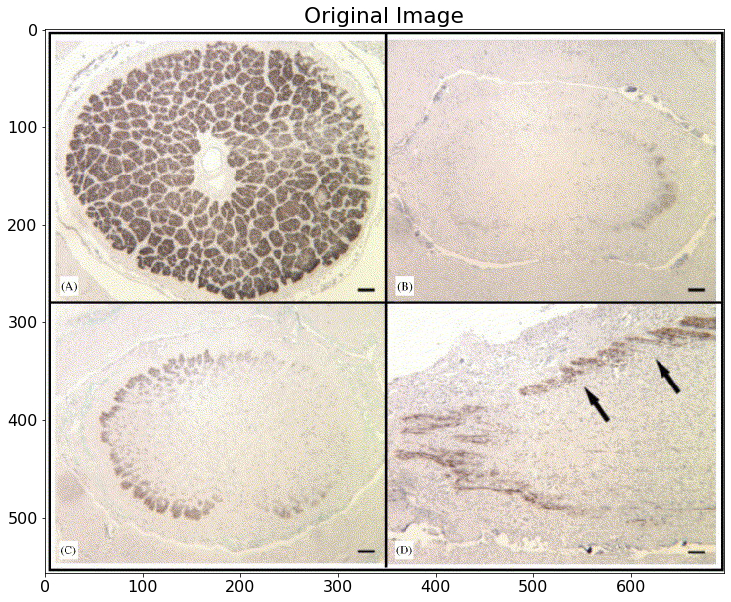

In [6]:
fname = '/content/drive/My Drive/cvps20/data/examples/axons_eye.jpg'
img = np.asarray(iio.imread(fname)) / 255.0
plt.imshow(img)
plt.title('Original Image')
plt.show()


**Count the number of axons in panel (A) of the image using thresholding and connected-component labeling.**

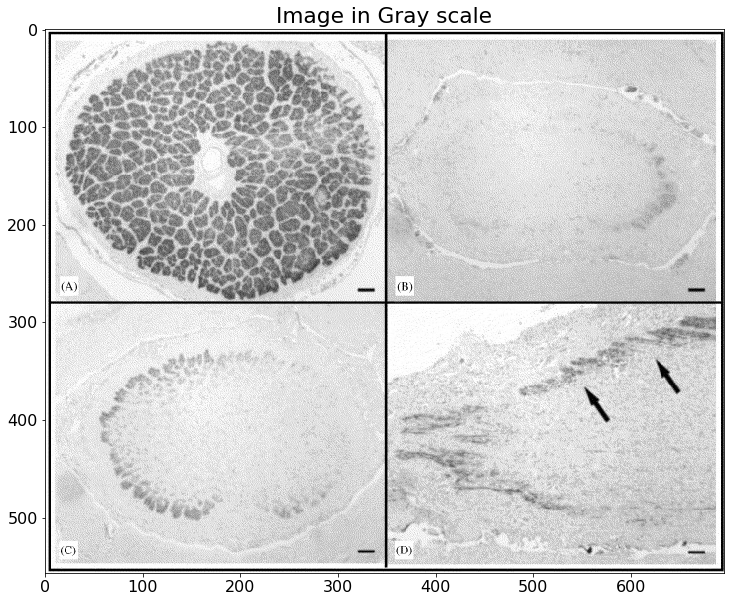

In [7]:
img_gray = np.asarray(iio.imread(fname, as_gray = 1)) / 255.0
plt.imshow(img_gray)
plt.title('Image in Gray scale')
plt.show()


Text(0.5, 1.0, 'Gray Scale Panel A')

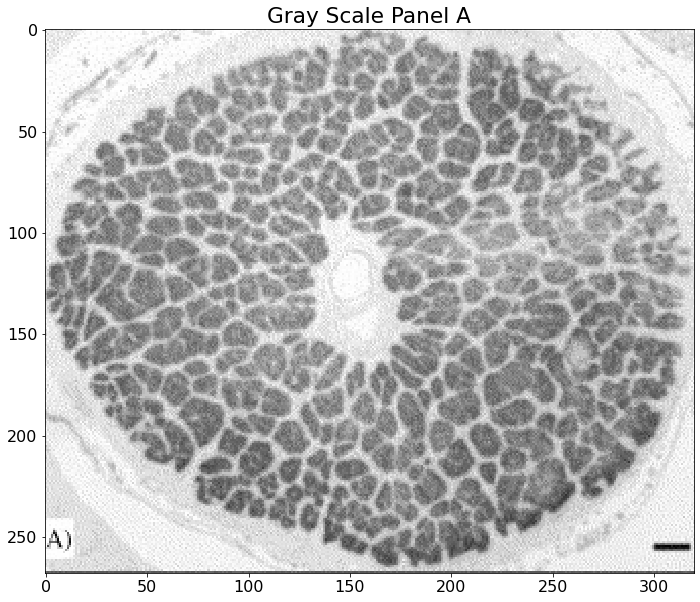

In [8]:

imgA_gray = img_gray[12:280, 20:340]
plt.imshow(imgA_gray)
plt.title('Gray Scale Panel A')

0.7032355 Otsu Threshold for Grey flattned image


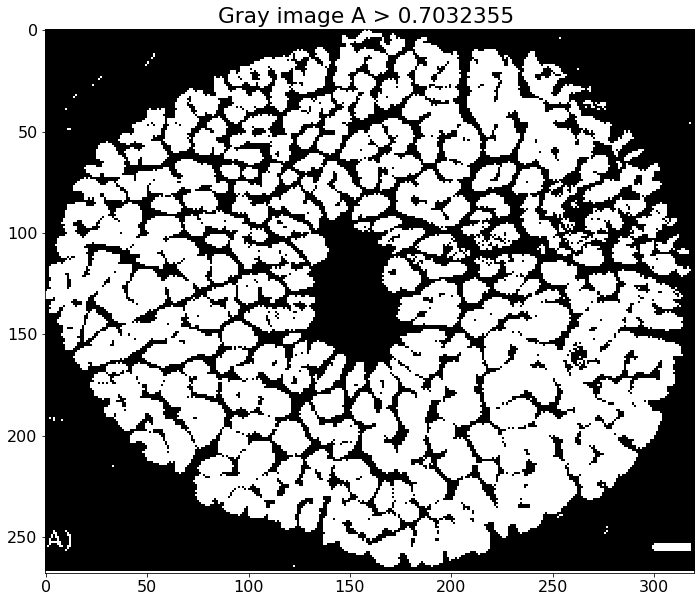

Number of Axons for Grey format Image A, my answer: 302


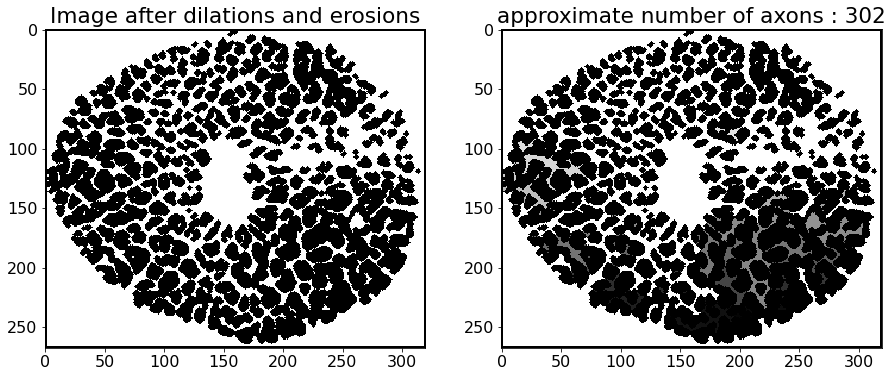

In [9]:
othrA_gray  = threshold_otsu(imgA_gray)
#labs_gray, nlabs_gray = snm.label(othrA_gray)
print(othrA_gray, 'Otsu Threshold for Grey flattned image')

plt.imshow(imgA_gray > othrA_gray, cmap = 'Greys')
plt.title('Gray image A > %s ' %othrA_gray)
plt.show()

#found through manual testing, eyeballed for effectiveness
gray_thr = imgA_gray > othrA_gray
gray_thr2 = binary_dilation(gray_thr, iterations=2)
gray_thr2 = binary_erosion(gray_thr2, iterations=2)
gray_thr2 = binary_dilation(gray_thr2, iterations=1)
gray_thr2 = binary_closing(gray_thr2, iterations=1)
gray_thr2 = binary_erosion(gray_thr2, iterations = 1)

final_gray_thrA = gray_thr2

#way worse
# gray_thr2 = binary_erosion(gray_thr, iterations=2)
# gray_thr2 = binary_dilation(gray_thr2, iterations=2)
# gray_thr2 = binary_erosion(gray_thr2, iterations=1)
# gray_thr2 = binary_closing(gray_thr2, iterations=1)
# gray_thr2 = binary_dilation(gray_thr2, iterations = 1)

# -- label the thresholded image
labs4, nlabs4 = snm.label(gray_thr2)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_thr2)
ax[0].set_title('Image after dilations and erosions')
ax[1].imshow(labs4, cmap="Greys", alpha=gray_thr2.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons : {0}".format(nlabs4))

fig.show()
print('Number of Axons for Grey format Image A, my answer: %s' % nlabs4)

**Count the number of axons in panel (C) of the image using thresholding and connected-component labeling.**

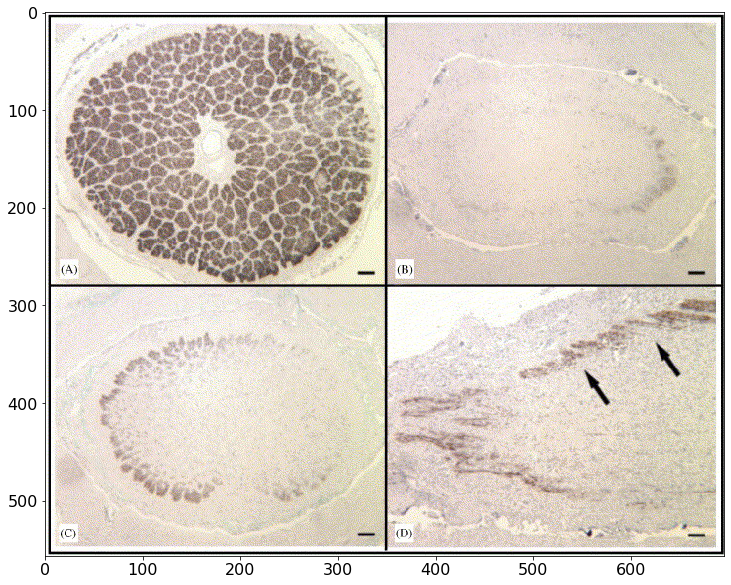

In [10]:
plt.imshow(img)

Text(0.5, 1.0, 'Gray Scale Panel C')

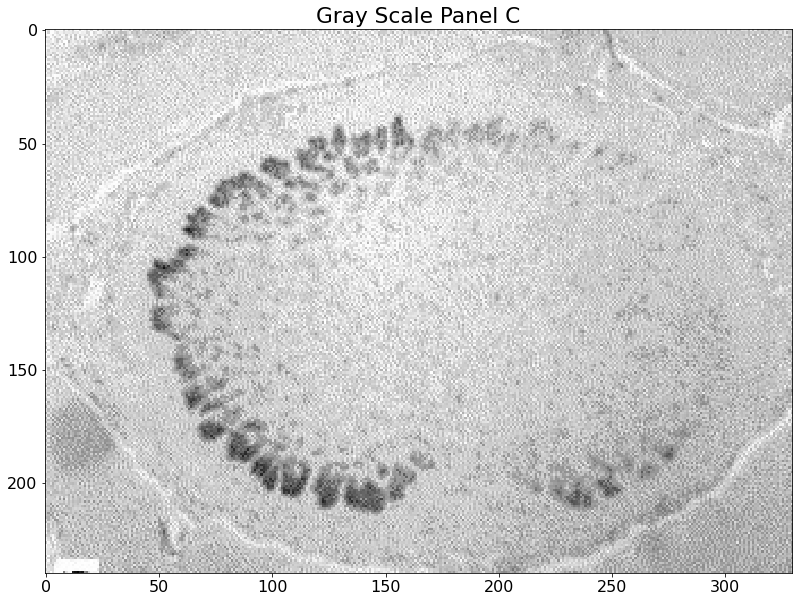

In [11]:
imgC_gray = img_gray[290:530, 10:340]
#290:550 for bar
plt.imshow(imgC_gray)
plt.title('Gray Scale Panel C')

0.8629927 Otsu Threshold for Grey flattened image


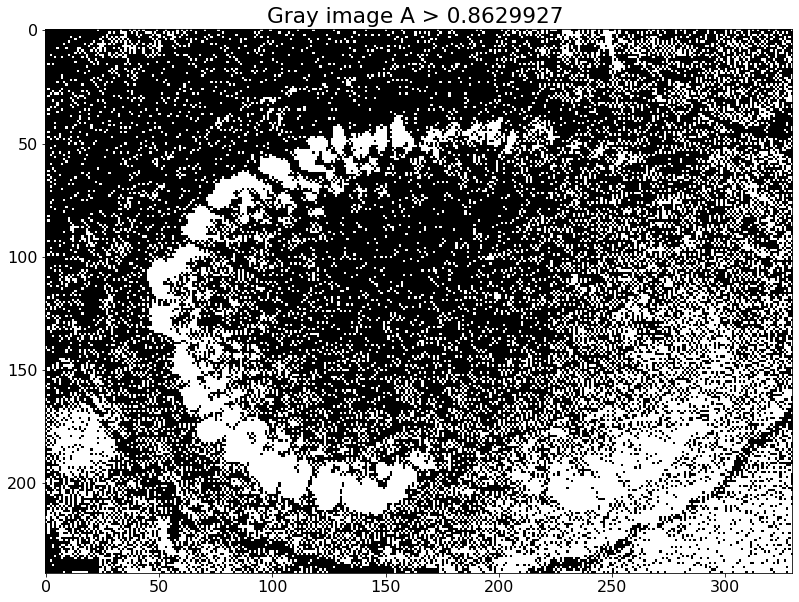

My answer for number of axons is 20


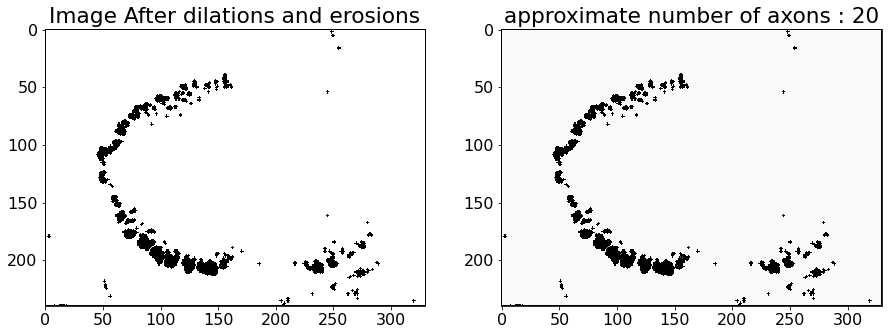

In [12]:
#No dilation or erosion done on this sample
othrC_gray  = threshold_otsu(imgC_gray)
print(othrC_gray, 'Otsu Threshold for Grey flattened image')

plt.imshow(imgC_gray > othrC_gray, cmap = 'Greys')
plt.title('Gray image A > %s ' %othrC_gray)
plt.show()

#gray_thr = imgC_gray > othrC_gray
#(C) in bottom and ---- bar will interfere
gray_thr = imgC_gray > .72
gray_thr2 = binary_erosion(gray_thr, iterations=1)
gray_thr2 = binary_dilation(gray_thr2, iterations=1)
gray_thr2 = binary_erosion(gray_thr2, iterations=1)
gray_thr2 = binary_dilation(gray_thr2, iterations=1)
gray_thr2 = binary_erosion(gray_thr2, iterations=1)
gray_thr2 = binary_closing(gray_thr2, iterations=1)

final_gray_thrC = gray_thr2

# -- label the thresholded image
labs5, nlabs5 = snm.label(gray_thr2)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_thr2)
ax[0].set_title('Image After dilations and erosions')

ax[1].imshow(labs5, cmap="Greys", alpha=gray_thr2.astype(float))
ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons : {0}".format(nlabs5))
print('My answer for number of axons is %s' % nlabs5)
fig.show()

**Calculate the size for each axon$^{\dagger}$ in panels (A) and (C) and make a histogram of individual axon areas in panel (A) and a similar histogram for the axons in panel (C).  The areas should be measured in square-microns given that the black bar in each panel is 100 microns.**

<small> $^{\dagger}$ calculate the size for each axon using functions from the `scipy.ndimage.measurements` [library](https://docs.scipy.org/doc/scipy/reference/ndimage.html#measurements). </small>


bar is approximately 17 (10-27) pixels long, so each pixel is 5.882352941176471 microns long


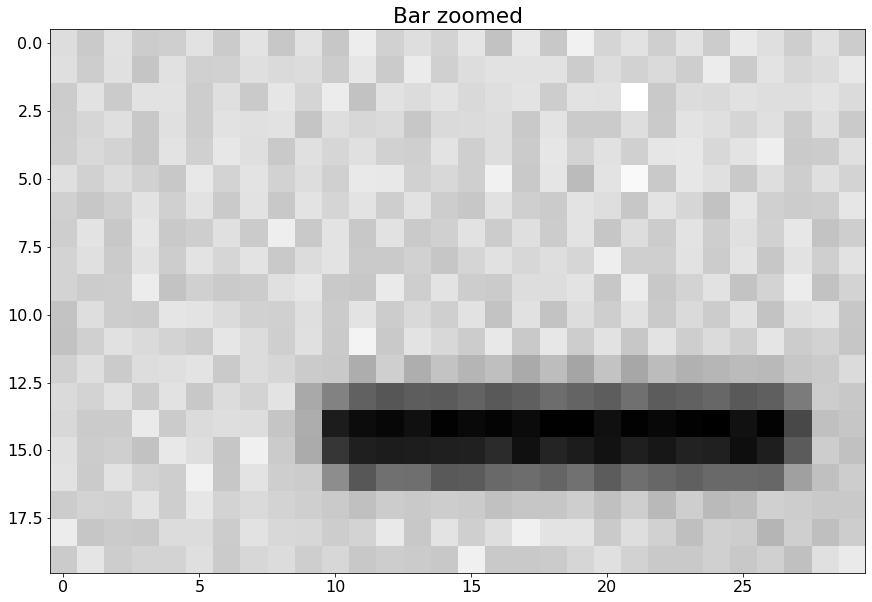

In [13]:
img_bar = img_gray[520:540, 310:340]
#290:550 for bar
plt.imshow(img_bar)
plt.title('Bar zoomed')
print("bar is approximately 17 (10-27) pixels long, so each pixel is %s" % (100/17) + ' microns long')
p_to_m = (100/17)

In [14]:
# from skimage.measure import regionprops

# properties = regionprops(labs4)
# print('Label \tLargest side')
# for p in properties:
#     min_row, min_col, max_row, max_col = p.bbox
#     #print('%5d %14.3f' % (p.label, max(max_row - min_row, max_col - min_col)))

# fig = plt.figure()
# ax = fig.add_subplot(111)    
# ax.imshow(np.ma.masked_array(labs4, ~final_gray_thrA), cmap=plt.cm.gist_rainbow) 
# ax.set_title('Labeled objects')
# plt.xticks([])
# plt.yticks([])
# r, c = np.vstack(ndimage.center_of_mass(imgA_gray, labs4, np.arange(nlabs4) + 1)).T
# for ri, ci, li in zip(r, c, range(1, nlabs4+1)):
#     ax.annotate(li, xy=(ci, ri), fontsize=24)
# plt.show()

In [15]:


# # label connected regions that satisfy this condition
# labels, nlabels = ndimage.label(final_gray_thrA)

# # find their centres of mass. in this case I'm weighting by the pixel values in
# # `img`, but you could also pass the boolean values in `blobs` to compute the
# # unweighted centroids.
# r, c = np.vstack(ndimage.center_of_mass(imgA_gray, labs4, np.arange(nlabs4) + 1)).T

# # find their distances from the top-left corner
# d = r*c

# # plot
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
# ax[0].imshow(imgA_gray)
# #ax[1].hold(True)
# ax[1].imshow(np.ma.masked_array(labs4, ~final_gray_thrA), cmap=plt.cm.rainbow)
# for ri, ci, di in zip(r, c, d):
#     ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
#                    arrowprops={'arrowstyle':'<-', 'shrinkA':0})
#     ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
#                    textcoords='offset points', ha='center', va='top',
#                    fontsize=4)
# for aa in ax.flat:
#     aa.set_axis_off()
# fig.tight_layout()
# plt.show()

In [16]:
# dists_microns = [i * p_to_m for i in dists]
# plt.hist(dists_microns, bins = 20)
# plt.title('Find_objects Area Histogram')
# plt.ylabel("Number of axons")
# plt.xlabel("Size in microns")

Text(0.5, 0, 'Size in microns')

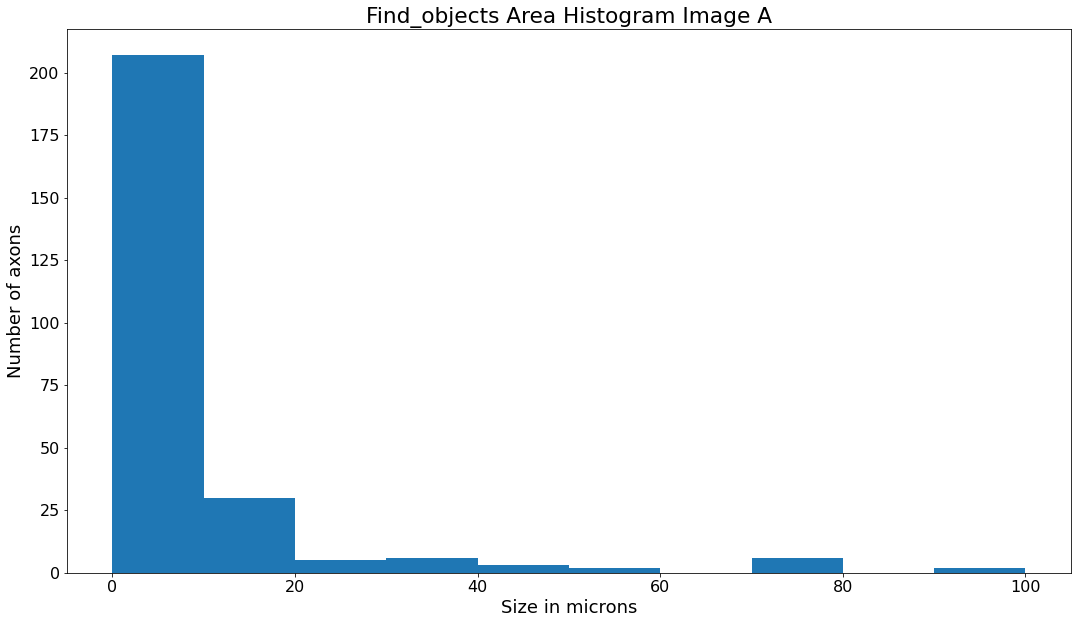

In [22]:

#My understanding attempt, using find_objects
#next two lines were taken from online
data_slices = ndimage.find_objects(labs4)
sizes = np.array([[s.stop-s.start for s in object_slice] 
                  for object_slice in data_slices])
areas = [i[0] * i[1] * p_to_m for i in sizes] 
plt.hist(areas, bins = 10, range=(0, 100))
plt.title('Find_objects Area Histogram Image A')
plt.ylabel("Number of axons")
plt.xlabel("Size in microns")

Text(0.5, 0, 'Size in microns')

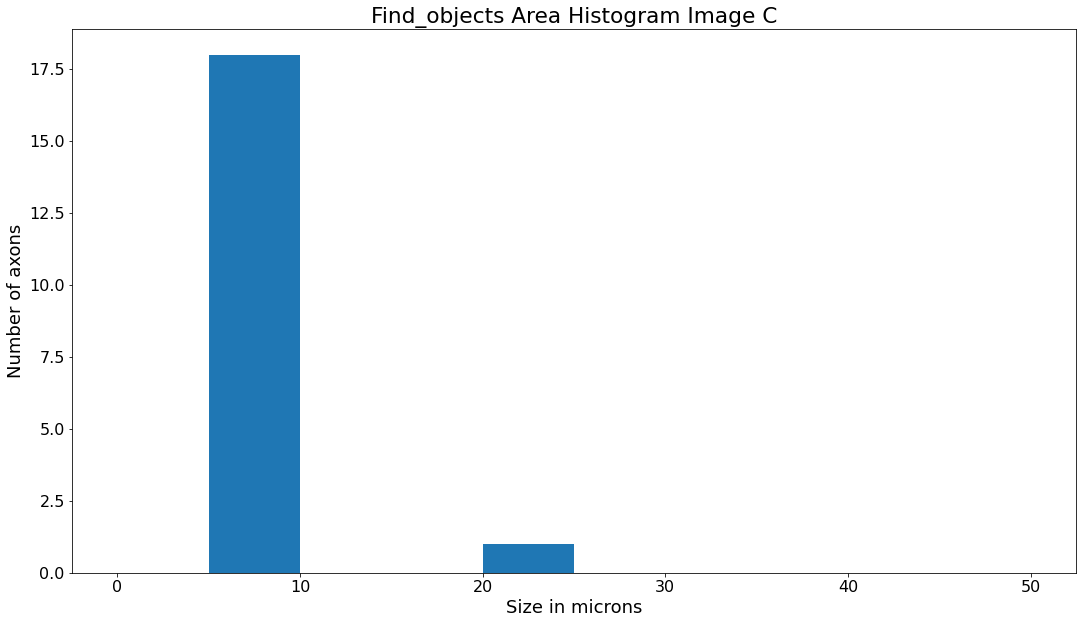

In [23]:
data_slices = ndimage.find_objects(labs5)
sizes = np.array([[s.stop-s.start for s in object_slice] 
                  for object_slice in data_slices])
areas = [i[0] * i[1] * p_to_m for i in sizes] 
plt.hist(areas, bins = 10, range=(0, 50))
plt.title('Find_objects Area Histogram Image C')
plt.ylabel("Number of axons")
plt.xlabel("Size in microns")

In [24]:
# import numpy as np
# from scipy import ndimage
# from matplotlib import pyplot as plt

# # generate some lowpass-filtered noise as a test image
# gen = np.random.RandomState(0)
# img = gen.poisson(2, size=(512, 512))
# img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
# img -= img.min()
# img /= img.max()

# # use a boolean condition to find where pixel values are > 0.75
# blobs = img > 0.75

# # label connected regions that satisfy this condition
# labels, nlabels = ndimage.label(blobs)

# # find their centres of mass. in this case I'm weighting by the pixel values in
# # `img`, but you could also pass the boolean values in `blobs` to compute the
# # unweighted centroids.
# r, c = np.vstack(ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T

# # find their distances from the top-left corner
# d = np.sqrt(r*r + c*c)

# # plot
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
# ax[0].imshow(imgA_gray)
# #ax[1].hold(True)
# ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
# for ri, ci, di in zip(r, c, d):
#     ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
#                    arrowprops={'arrowstyle':'<-', 'shrinkA':0})
#     ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
#                    textcoords='offset points', ha='center', va='top',
#                    fontsize='x-large')
# for aa in ax.flat:
#     aa.set_axis_off()
# fig.tight_layout()
# plt.show()

**Plot a histogram of the radial distance (in microns) of the axons from the "center" of the eye in panel (A) and a similar histogram for the axons in panel (C).**

In [25]:

#find center of all axons
total_center = snm.center_of_mass(final_gray_thrA, labels=labs4)
dists = []
for i in range(1, nlabs4): #starting at 0 returns nan
  #find location of specific axon
  loc = snm.center_of_mass(final_gray_thrA, labs4, i)
  dists.append(distance.euclidean(total_center, loc)) #2D distance from center

Not sure why the positions are so messed up, not corresponding to true object center or even to a singular object


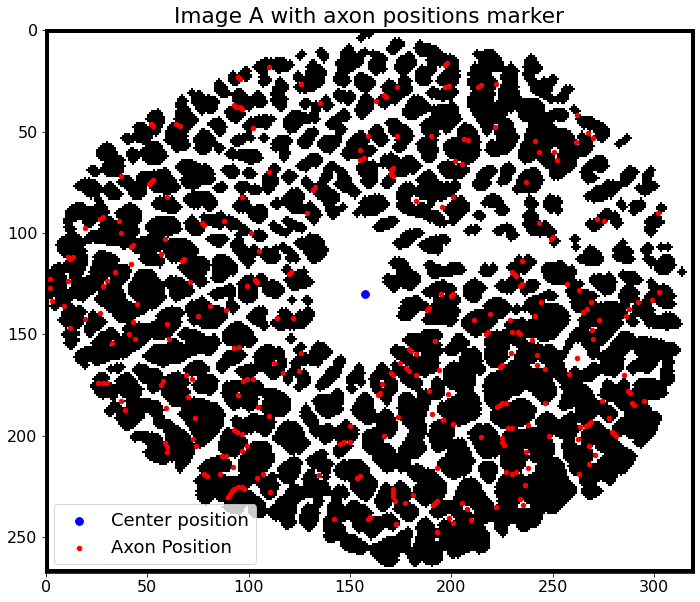

In [26]:
#same as above but plotting
total_center = snm.center_of_mass(final_gray_thrA, labels=labs4)
dists = []
plt.imshow(final_gray_thrA)
plt.scatter(total_center[1], total_center[0], c = 'b', s = 60, label = 'Center position')
locations = []
for i in range(2, nlabs4):
  loc = snm.center_of_mass(final_gray_thrA, labs4, i)
  locations.append(loc)
  #plt.scatter(loc[1], loc[0], c = 'red', s = 20)
  dists.append(distance.euclidean(total_center, loc))
plt.scatter([i[1] for i in locations], [i[0] for i in locations], c = 'red', s = 20, label = 'Axon Position')
plt.title('Image A with axon positions marker')
plt.legend()
print('Not sure why the positions are so messed up, not corresponding to true object center or even to a singular object')

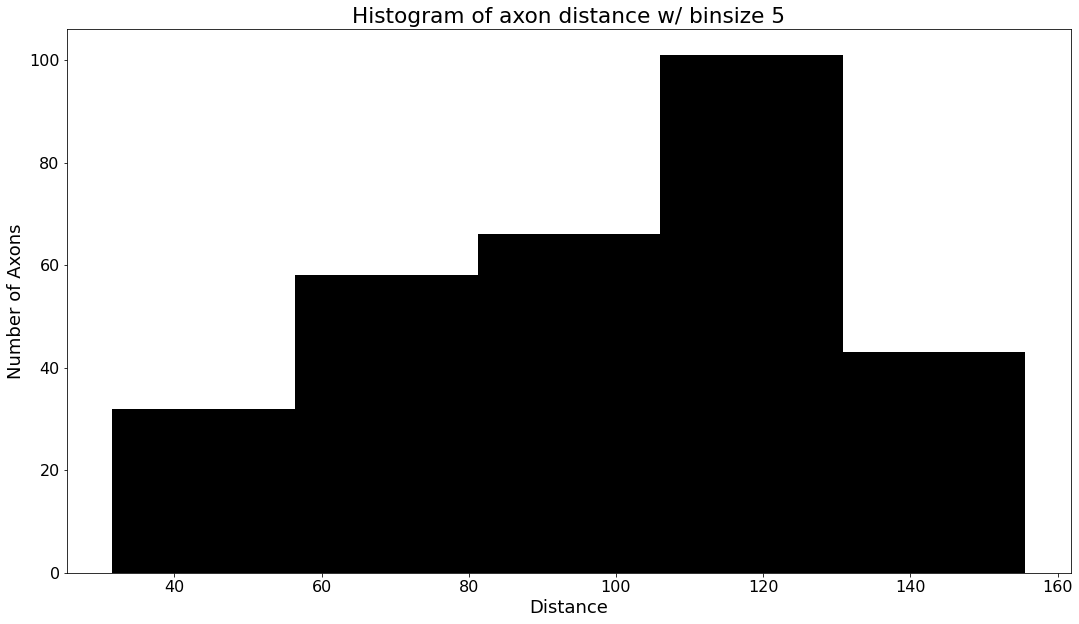

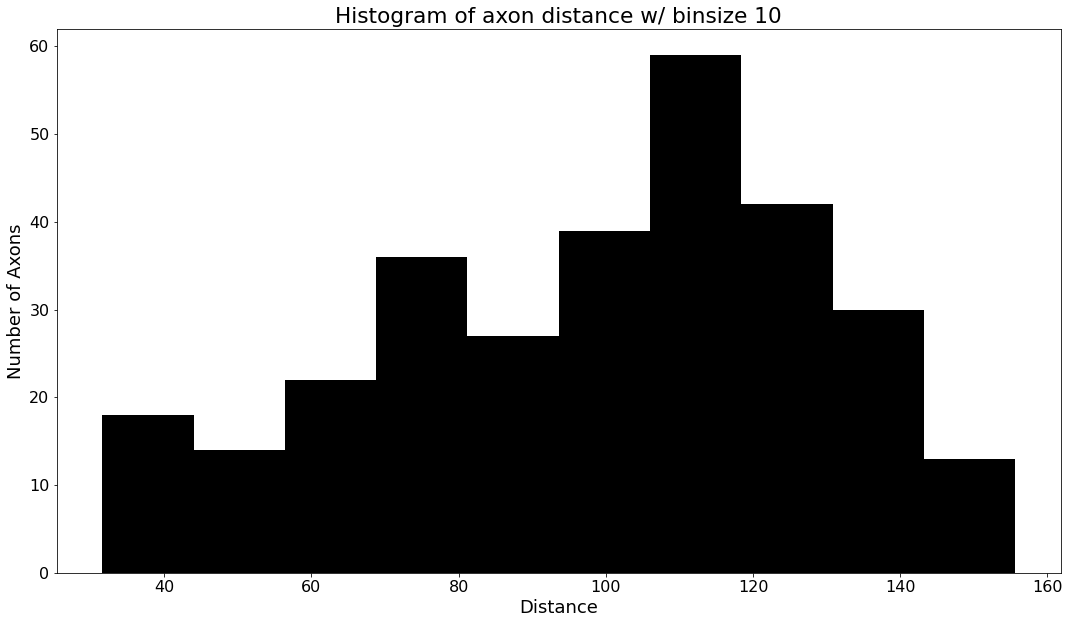

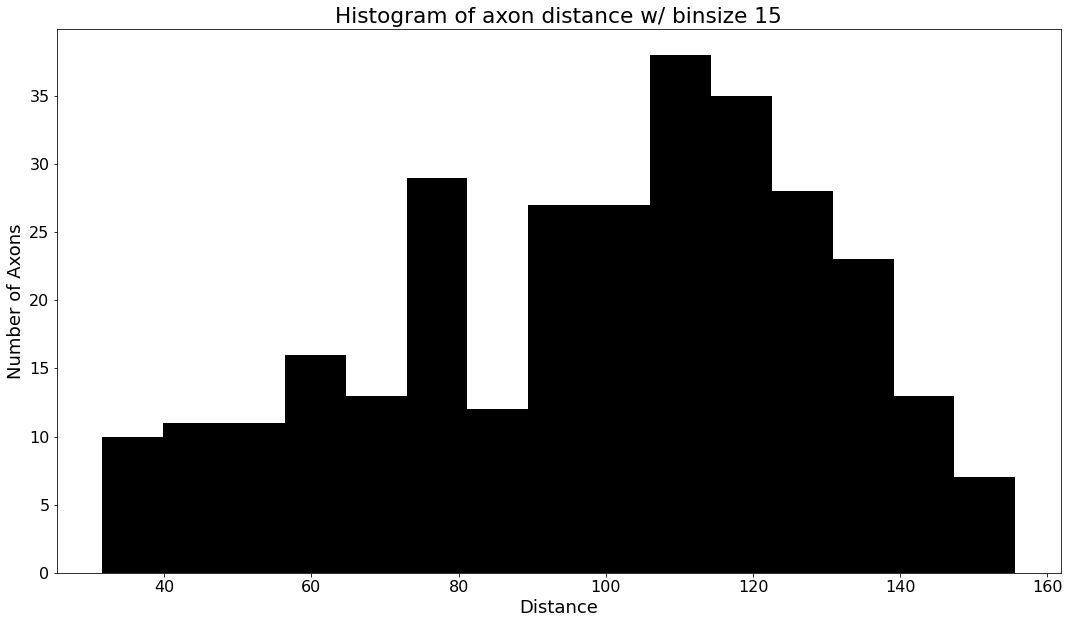

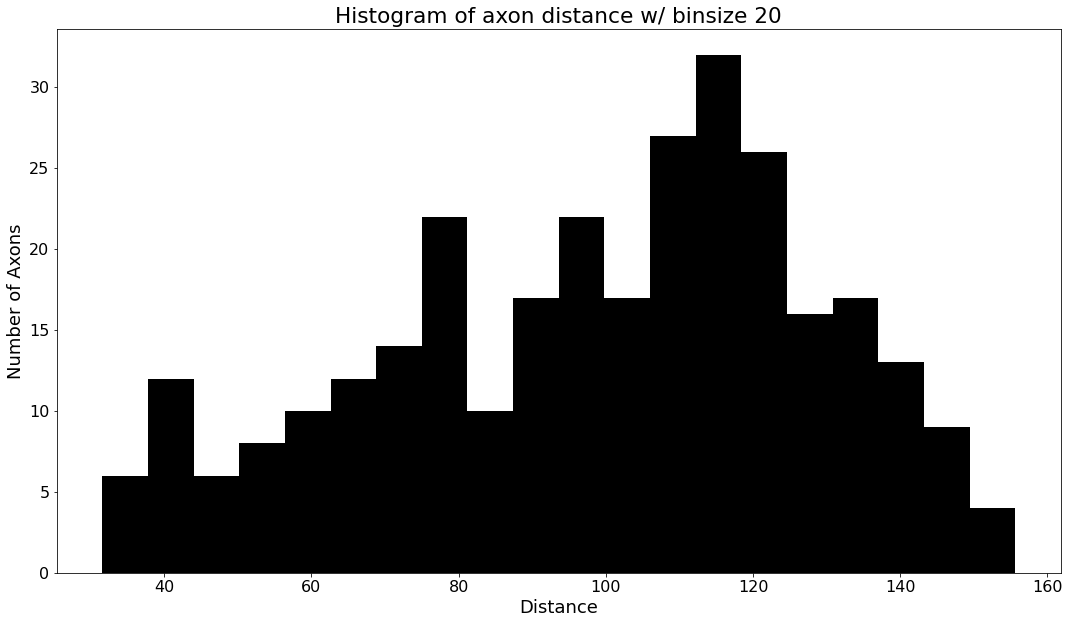

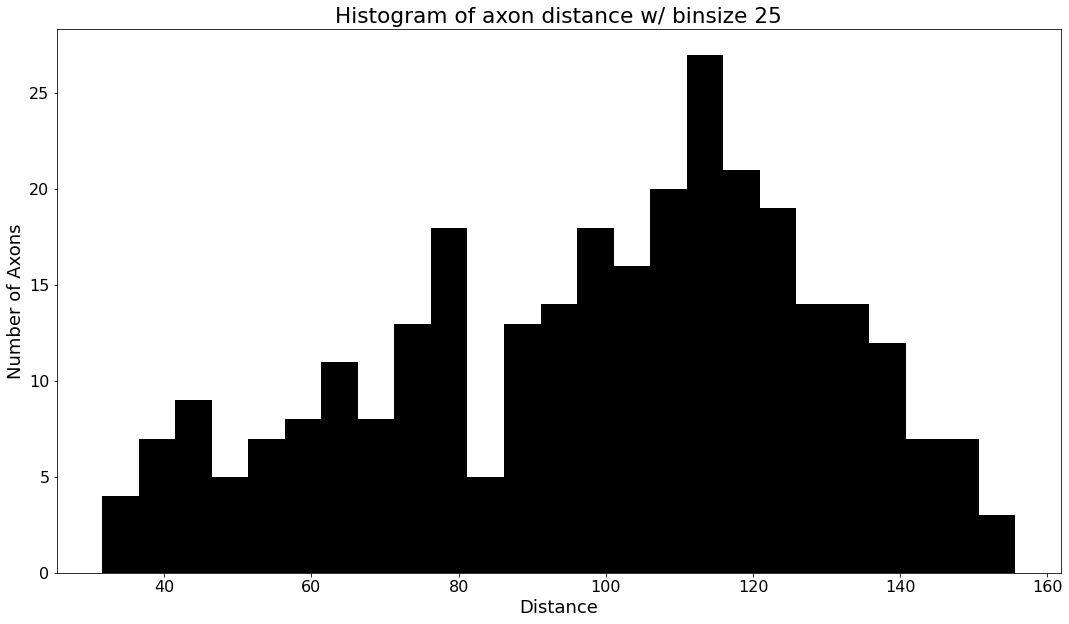

In [27]:
bin_num = [5, 10, 15, 20, 25]
for i in bin_num:
  plt.hist(dists, bins = i, color = 'k')
  plt.xlabel('Distance')
  plt.ylabel('Number of Axons')
  plt.title('Histogram of axon distance w/ binsize %s' % i)
  plt.show()

In [28]:
print('Start of Image C code')

Start of Image C code


In [29]:

#find center of all axons
total_center = snm.center_of_mass(final_gray_thrC, labels=labs5)
dists = []
for i in range(1, nlabs5): #starting at 0 returns nan
  #find location of specific axon
  loc = snm.center_of_mass(final_gray_thrC, labs5, i)
  dists.append(distance.euclidean(total_center, loc)) #2D distance from center

Positions also wonky here


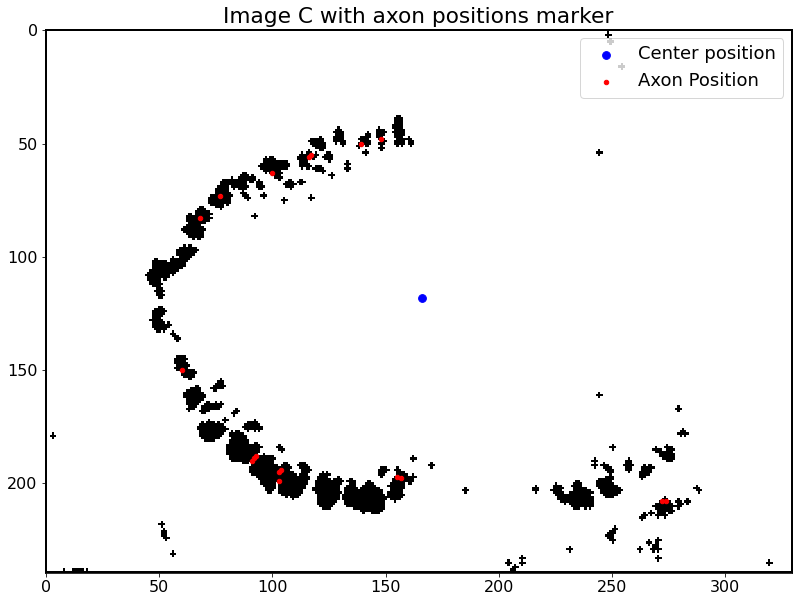

In [30]:
#same as above but plotting
total_center = snm.center_of_mass(final_gray_thrC, labels=labs5)
dists = []
plt.imshow(final_gray_thrC)
plt.scatter(total_center[1], total_center[0], c = 'b', s = 60, label = 'Center position')
locations = []
for i in range(2, nlabs5):
  loc = snm.center_of_mass(final_gray_thrC, labs5, i)
  locations.append(loc)
  #plt.scatter(loc[1], loc[0], c = 'red', s = 20)
  dists.append(distance.euclidean(total_center, loc))
plt.scatter([i[1] for i in locations], [i[0] for i in locations], c = 'red', s = 20, label = 'Axon Position')
plt.title('Image C with axon positions marker')
plt.legend()
print('Positions also wonky here')

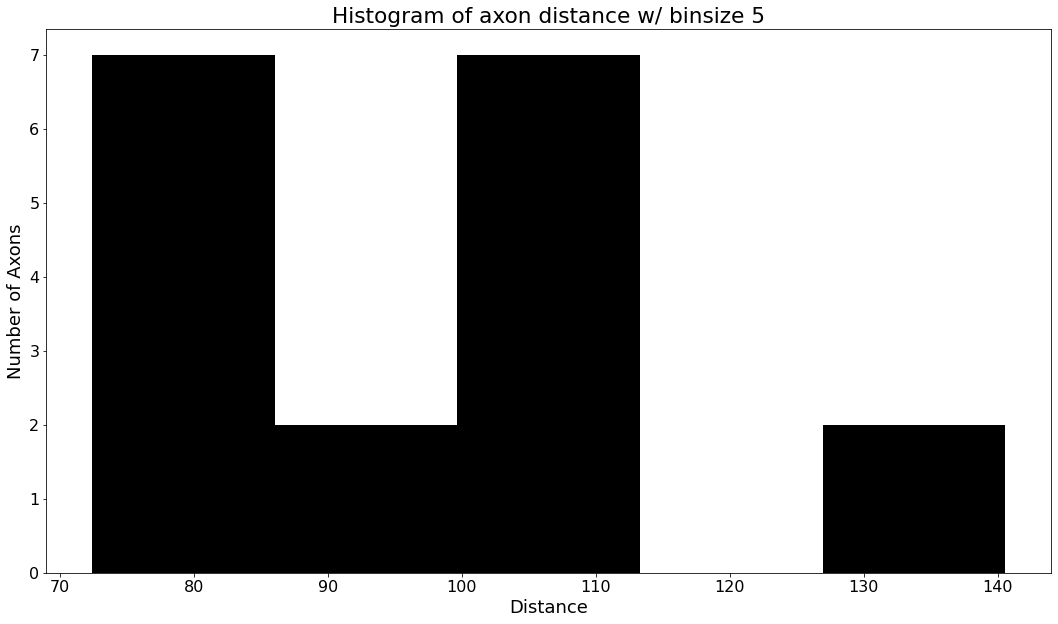

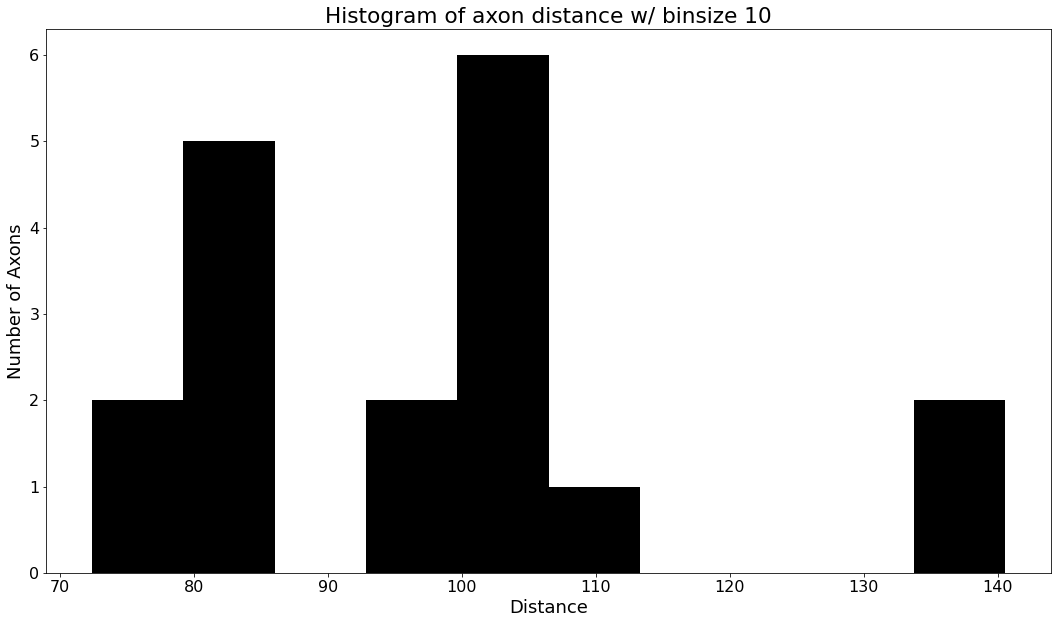

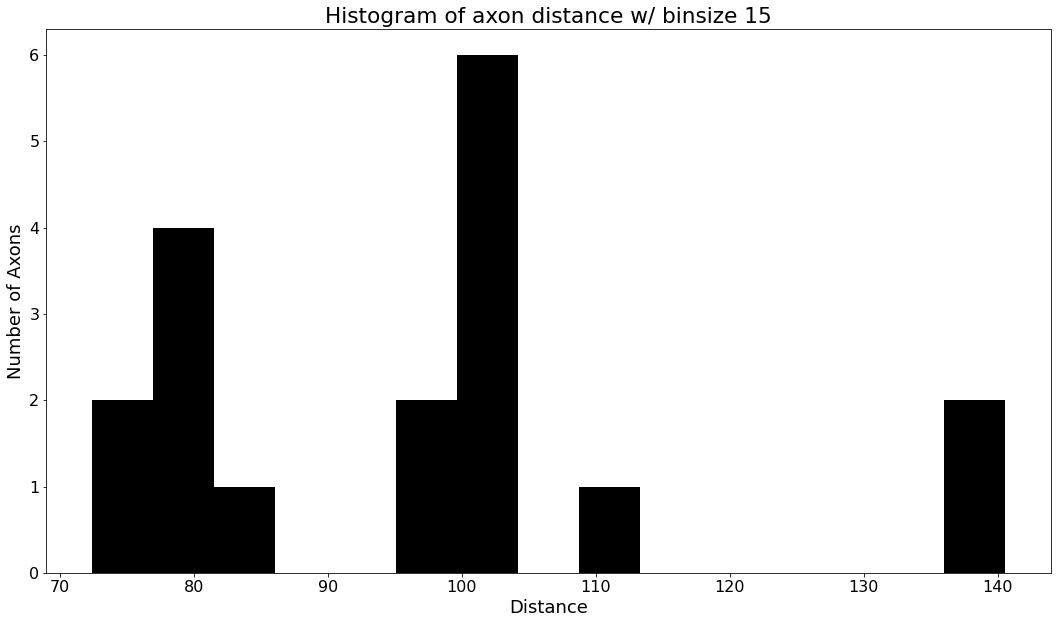

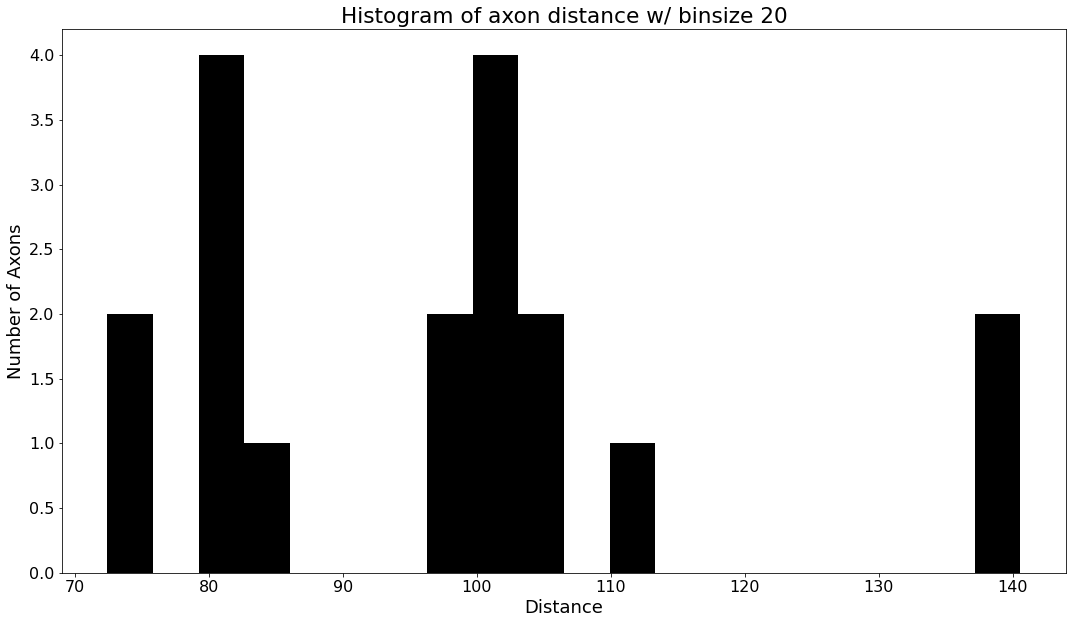

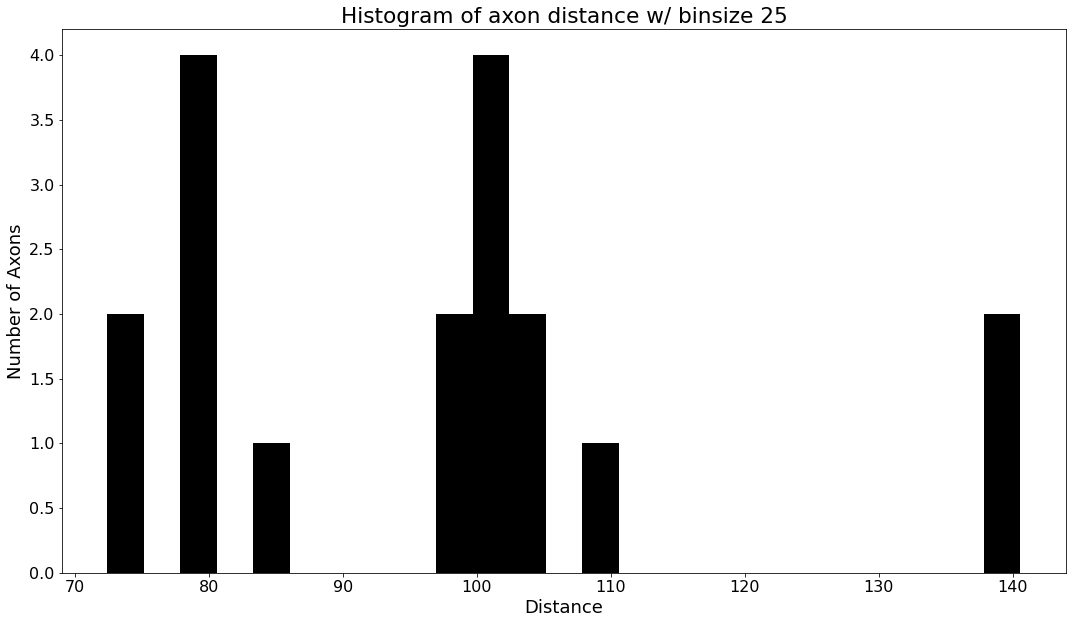

In [31]:
bin_num = [5, 10, 15, 20, 25]
for i in bin_num:
  plt.hist(dists, bins = i, color = 'k')
  plt.xlabel('Distance')
  plt.ylabel('Number of Axons')
  plt.title('Histogram of axon distance w/ binsize %s' % i)
  plt.show()

In [32]:
print('Start of non-gray code, misc. stuff')
print('------------------------------------------------------------------')

Start of non-gray code, misc. stuff
------------------------------------------------------------------


0.740234375 0.693359375 0.634765625
879
486
1350
905 total number of axons before image manipulation
0.689453125 mean of the Otsu thresholds
0.693359375 the threshold found with Otsu with no color weight
309.6666666666667 mean of axon count after image manipulation


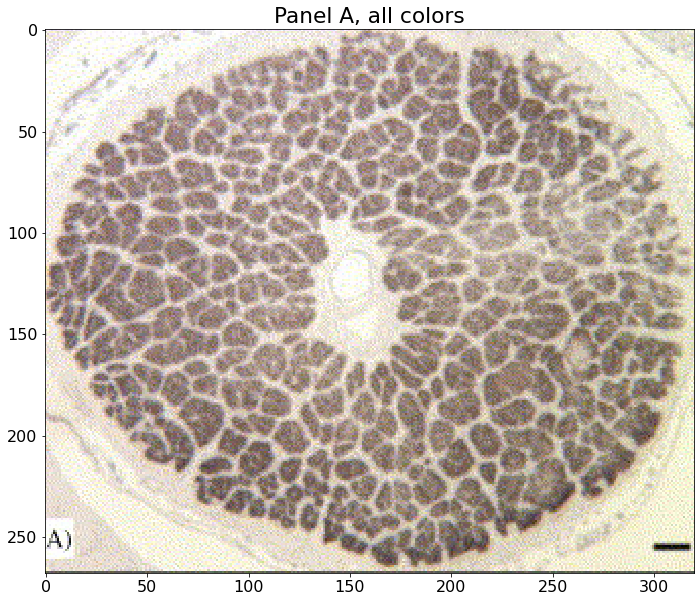

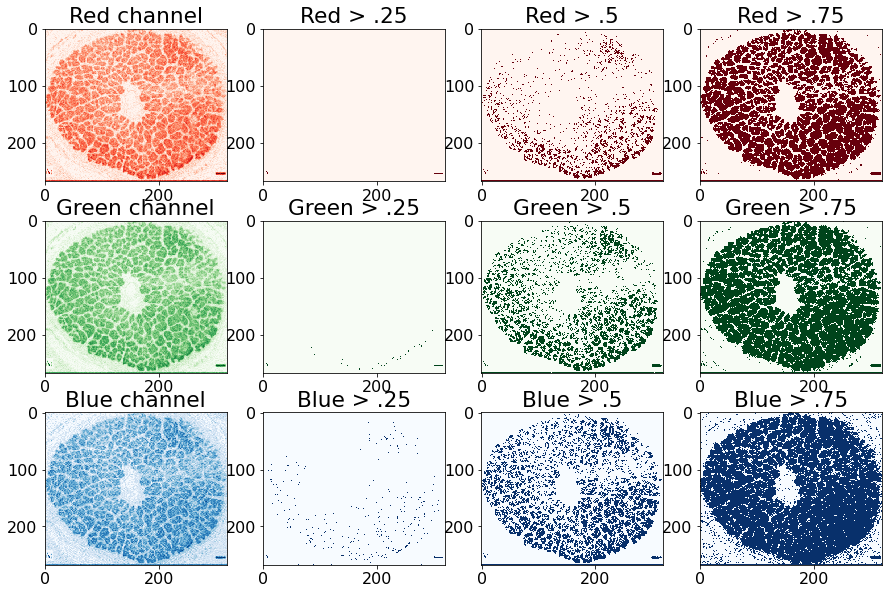

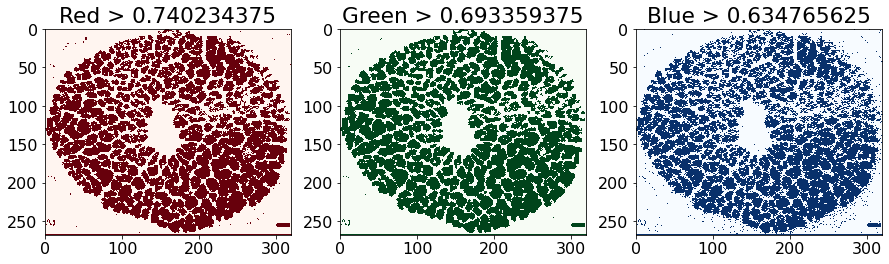

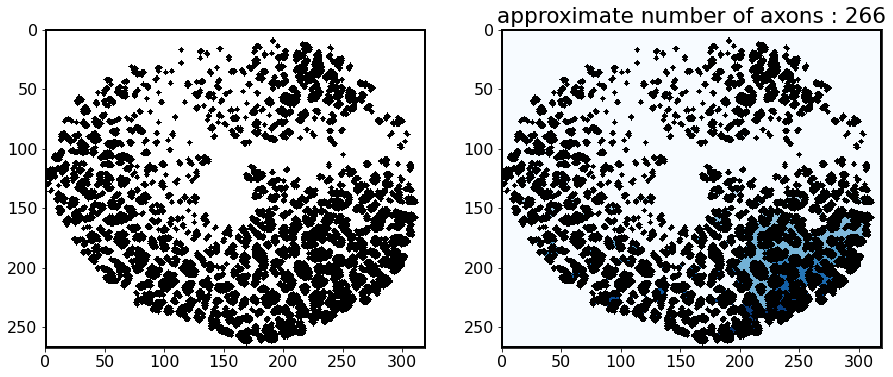

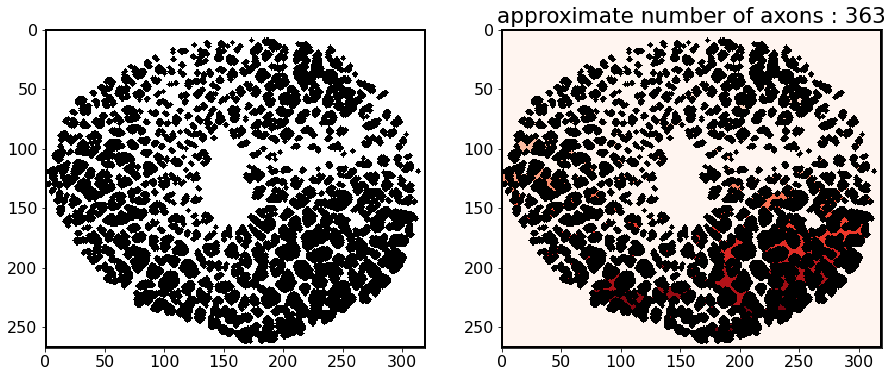

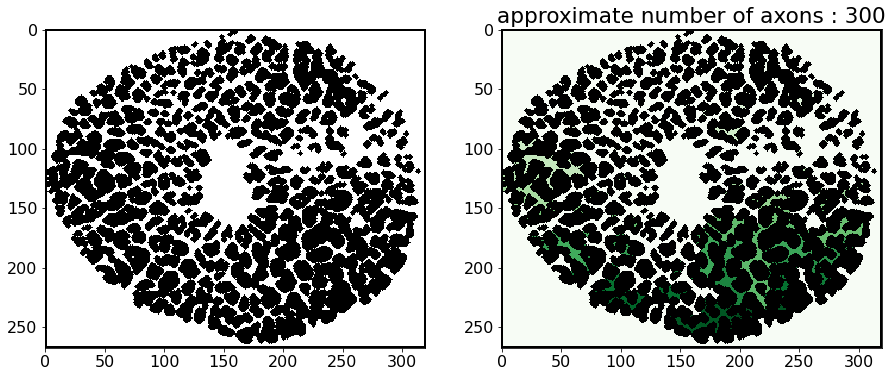

In [33]:
imgA = img[12:280, 20:340, :]
plt.imshow(imgA)
plt.title('Panel A, all colors')

red, grn, blu = imgA.transpose(2, 0, 1)
#using example from class to get rough idea of threshold. .5 looks like its missing many spots, .75 shows some blending
cmaps = ['Reds_r', 'Greens_r', "Blues_r"]
names = ['Red', 'Green', 'Blue']
fig, ax = plt.subplots(3, 4, figsize=(15, 10))

for ii in range(0,3):
  #red, then green, then blue, map of corner A, for different thresholds
  ax[ii,0].imshow(imgA[:, :, ii], cmap = cmaps[ii])
  ax[ii,1].imshow(imgA[:, :, ii] > .25, cmap = cmaps[ii])
  ax[ii,2].imshow(imgA[:, :, ii] > .5, cmap = cmaps[ii])
  ax[ii,3].imshow(imgA[:, :, ii] > .75, cmap = cmaps[ii])

  ax[ii,0].set_title(names[ii] + " channel")
  ax[ii, 1].set_title(names[ii] + " > .25")
  ax[ii, 2].set_title(names[ii] + " > .5")
  ax[ii, 3].set_title(names[ii] + " > .75")

fig.show()


#find the three otsu thresholds
othr1, othr2, othr3  = threshold_otsu(red), threshold_otsu(grn), threshold_otsu(blu)
print(othr1, othr2, othr3)
othrs = [othr1, othr2, othr3]

# -- show the image using Otsu's threshold, with different thresholds for the different colors
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for ii in range(0,3):
  ax[ii].imshow(imgA[:, :, ii] > othrs[ii], cmap = cmaps[ii])
  ax[ii].set_title(names[ii] + ' > %s' % othrs[ii])


fig.show()

#creation of the threshold cutoff images using otsu value
red_thr = red > othr1
grn_thr = grn > othr2
blu_thr = blu > othr3
total_labls = 0

#find the number of objects for each color past otsu threshold, add to total labels count
labls, nlabls = snm.label(red_thr)
total_labls += nlabls
print(nlabls)

labls, nlabls = snm.label(grn_thr)
total_labls += nlabls
print(nlabls)

labls, nlabls = snm.label(blu_thr)
total_labls += nlabls
print(nlabls)

print(int(total_labls/3), 'total number of axons before image manipulation')
print(np.mean(othrs), 'mean of the Otsu thresholds')
othr_grey = threshold_otsu(imgA.flatten())
print(othr_grey, 'the threshold found with Otsu with no color weight')
#why is this exact same as green threshold?
#should i have just used this number?


# -- erode the binary image
blu_thr2 = binary_dilation(blu_thr, iterations=2)
blu_thr2 = binary_erosion(blu_thr2, iterations=2)
blu_thr2 = binary_dilation(blu_thr2, iterations=1)
blu_thr2 = binary_closing(blu_thr2, iterations=1)
blu_thr2 = binary_erosion(blu_thr2, iterations = 1)

# -- label the thresholded image
labs, nlabs = snm.label(blu_thr2)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(blu_thr2)
ax[1].imshow(labs, cmap="Blues", alpha=blu_thr2.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons : {0}".format(nlabs))

fig.show()


# -- erode the binary image
red_thr2 = binary_dilation(red_thr, iterations=2)
red_thr2 = binary_erosion(red_thr2, iterations=2)
red_thr2 = binary_dilation(red_thr2, iterations=1)
red_thr2 = binary_closing(red_thr2, iterations=1)
red_thr2 = binary_erosion(red_thr2, iterations = 1)

# -- label the thresholded image
labs2, nlabs2 = snm.label(red_thr2)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(red_thr2)
ax[1].imshow(labs2, cmap="Reds", alpha=red_thr2.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons : {0}".format(nlabs2))

fig.show()

# -- erode the binary image
grn_thr2 = binary_dilation(grn_thr, iterations=2)
grn_thr2 = binary_erosion(grn_thr2, iterations=2)
grn_thr2 = binary_dilation(grn_thr2, iterations=1)
grn_thr2 = binary_closing(grn_thr2, iterations=1)
grn_thr2 = binary_erosion(grn_thr2, iterations = 1)

# -- label the thresholded image
labs3, nlabs3 = snm.label(grn_thr2)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(grn_thr2)
ax[1].imshow(labs3, cmap="Greens", alpha=grn_thr2.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons : {0}".format(nlabs3))

fig.show()

print(int(nlabs + nlabs2 + nlabs3)/3, 'mean of axon count after image manipulation')

0.892578125 0.849609375 0.798828125
2836 Mean total number of objects averaged over color channels from Otsu 
0.8470052083333334 mean of the Otsu thresholds
29 Mean total number of objects averaged over color channels from my thresholds 
0.8470052083333334 mean of My thresholds


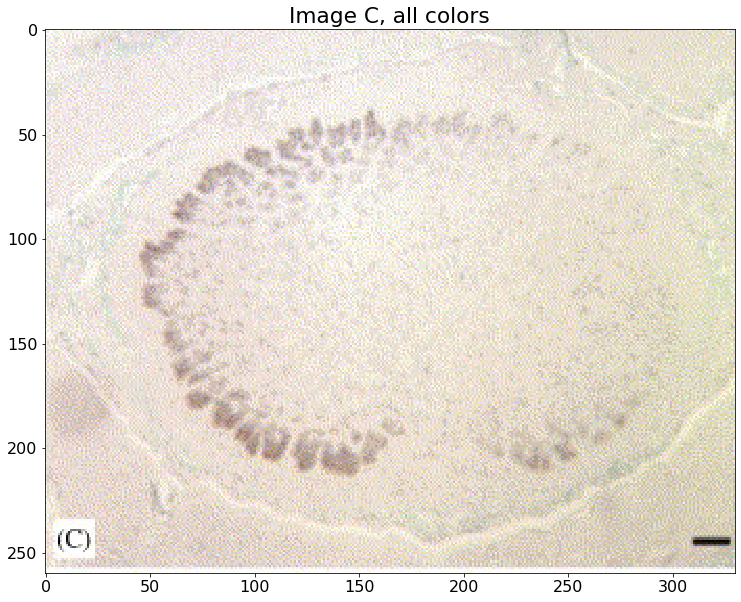

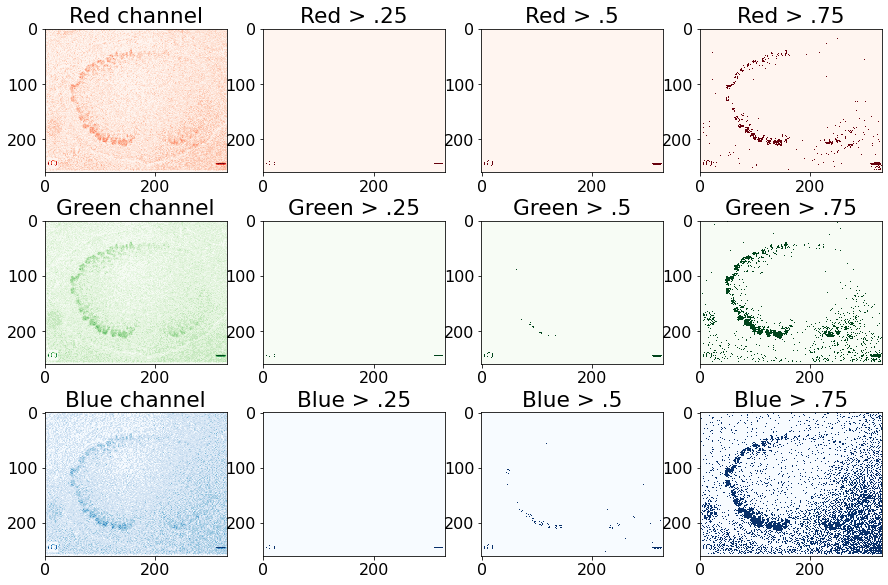

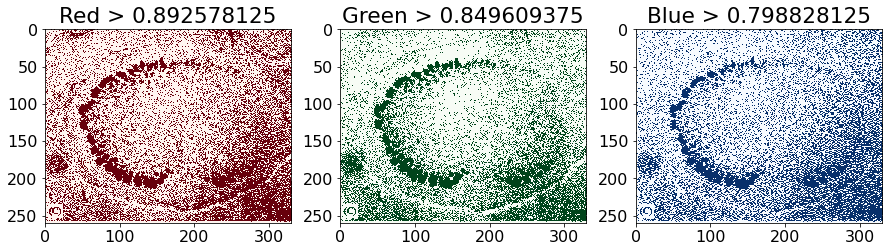

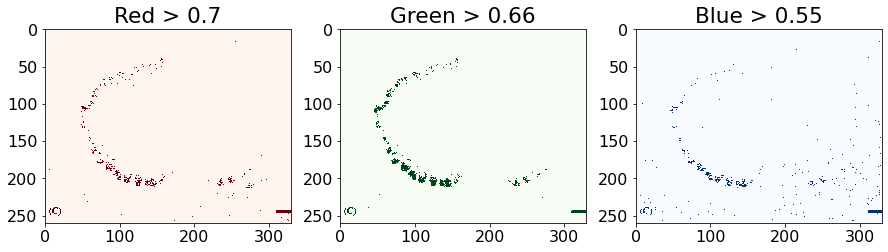

In [34]:
imgC = img[290:550, 10:340, :]
plt.imshow(imgC)
plt.title('Image C, all colors')

red, grn, blu = imgC.transpose(2, 0, 1)

#using example from class to get rough idea of threshold. .5 looks like its missing many spots, .75 shows some blending
cmaps = ['Reds_r', 'Greens_r', "Blues_r"]
names = ['Red', 'Green', 'Blue']
fig, ax = plt.subplots(3, 4, figsize=(15, 10))

for ii in range(0,3):
  #red, then green, then blue, map of corner A, for different thresholds
  ax[ii,0].imshow(imgC[:, :, ii], cmap = cmaps[ii])
  ax[ii,1].imshow(imgC[:, :, ii] > .25, cmap = cmaps[ii])
  ax[ii,2].imshow(imgC[:, :, ii] > .5, cmap = cmaps[ii])
  ax[ii,3].imshow(imgC[:, :, ii] > .75, cmap = cmaps[ii])

  ax[ii,0].set_title(names[ii] + " channel")
  ax[ii, 1].set_title(names[ii] + " > .25")
  ax[ii, 2].set_title(names[ii] + " > .5")
  ax[ii, 3].set_title(names[ii] + " > .75")

fig.show()

othr1, othr2, othr3  = threshold_otsu(red), threshold_otsu(grn), threshold_otsu(blu)
print(othr1, othr2, othr3)
othrs = [othr1, othr2, othr3]


# -- show the image using Otsu's threshold, with different thresholds for the different colors
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for ii in range(0,3):
  ax[ii].imshow(imgC[:, :, ii] > othrs[ii], cmap = cmaps[ii])
  ax[ii].set_title(names[ii] + ' > %s' % othrs[ii])


fig.show()

my_thresh = [.70, .66, .55]
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for ii in range(0,3):
  ax[ii].imshow(imgC[:, :, ii] > my_thresh[ii], cmap = cmaps[ii])
  ax[ii].set_title(names[ii] + ' > %s' % my_thresh[ii])


fig.show()

red_thr = red > othr1
grn_thr = grn > othr2
blu_thr = blu > othr3
total_labls = 0

#find the number of objects for each color past otsu threshold, add to total labels count
labls, nlabls = snm.label(red_thr)
total_labls += nlabls

labls, nlabls = snm.label(grn_thr)
total_labls += nlabls

labls, nlabls = snm.label(blu_thr)
total_labls += nlabls

print(int(total_labls/3), 'Mean total number of objects averaged over color channels from Otsu ')

print(np.mean(othrs), 'mean of the Otsu thresholds')

red_thr = red > my_thresh[0]
grn_thr = grn > my_thresh[1]
blu_thr = blu > my_thresh[2]
total_labls = 0

#find the number of objects for each color past otsu threshold, add to total labels count
labls, nlabls = snm.label(red_thr)
total_labls += nlabls

labls, nlabls = snm.label(grn_thr)
total_labls += nlabls

labls, nlabls = snm.label(blu_thr)
total_labls += nlabls

print(int(total_labls/3), 'Mean total number of objects averaged over color channels from my thresholds ')
print(np.mean(othrs), 'mean of My thresholds')